<a href="https://colab.research.google.com/github/Shailajgautam/FDV-AI-Intern-Task/blob/main/Intern_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI Internship Week-1 Task:**
  Please find the attached dataset, and do EDA on this. Also if you find feasible build a predictive model out of this.

# **Importing the necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# **Importing CSV fILE**

In [2]:
df = pd.read_csv("/content/sample_data/car.csv")


# **Visualizing the Data**

In [3]:
# Display the first few rows of the DataFrame
print(df.head())


                                                Name  \
0  Hyundai | i20 Active S | TDi | 2015 | Hatchbac...   
1                    Excellent car on sale (Hyundai)   
2                          TATA 407 Container (Tata)   
3                        4x4 swaraj Mazda (Mahindra)   
4        i20 Active good for used few time (Hyundai)   

                        Price     Used For   Transmisson      Colour  \
0  रू. 24,75,000रू. 25,00,000  Private Use     Manual2WD       Brown   
1                रू. 7,50,000          NaN       Auto2WD  Light blue   
2                रू. 7,00,000          NaN  Manual - 2WD       White   
3                रू. 6,00,000          NaN  Manual - 4WD         NaN   
4                     रू. 375          NaN    Auto - 2WD       white   

  Make Year Mileage Engine (CC)    Fuel Kilometer Run Waranty  Types  
0      2015      14        1400  Petrol         42000     NaN    NaN  
1      2005      11        1399  Petrol         87412     NaN    NaN  
2      2013     N

In [4]:
# Check the shape of the DataFrame
print(df.shape)


(848, 12)


In [5]:
# Get an overview of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           848 non-null    object 
 1   Price          848 non-null    object 
 2   Used For       357 non-null    object 
 3   Transmisson    848 non-null    object 
 4   Colour         766 non-null    object 
 5   Make Year      848 non-null    object 
 6   Mileage        458 non-null    object 
 7   Engine (CC)    741 non-null    object 
 8   Fuel           848 non-null    object 
 9   Kilometer Run  706 non-null    object 
 10  Waranty        209 non-null    object 
 11  Types          0 non-null      float64
dtypes: float64(1), object(11)
memory usage: 79.6+ KB
None


In [6]:
# Calculate null percentage of each column
null_percentage = (df.isnull().sum() / len(df)) * 100
print("Null percentage of each column:")
print(null_percentage)

# Check for missing values in the DataFrame
print(df.isnull().sum())



Null percentage of each column:
Name               0.000000
Price              0.000000
Used For          57.900943
Transmisson        0.000000
Colour             9.669811
Make Year          0.000000
Mileage           45.990566
Engine (CC)       12.617925
Fuel               0.000000
Kilometer Run     16.745283
Waranty           75.353774
Types            100.000000
dtype: float64
Name               0
Price              0
Used For         491
Transmisson        0
Colour            82
Make Year          0
Mileage          390
Engine (CC)      107
Fuel               0
Kilometer Run    142
Waranty          639
Types            848
dtype: int64


# **Cleaning the data :**

# **Dropping Irrelevant Columns**

In [7]:
# Remove irrelevant columns
df_cleaned = df.drop(columns=['Types', 'Waranty', 'Used For'])

# Display summary statistics
print(df_cleaned.describe())


                           Name          Price   Transmisson Colour Make Year  \
count                       848            848           848    766       848   
unique                      832            316            10    182        40   
top     Hyundai Creta (Hyundai)  रू. 15,00,000  Manual - 2WD  White      2016   
freq                          5             19           297    100        80   

       Mileage Engine (CC)    Fuel Kilometer Run  
count      458         741     848           706  
unique      87         140       4           247  
top         15        1200  Petrol         50000  
freq        62         160     604            20  


# **Cleaning Name**

In [8]:
# Print 'Name' column before cleaning
print("Name column before cleaning:")
print(df['Name'])

# Define a function to extract model number and brand name and combine them
def clean_name(name):
    # Extract model number and brand name
    match = re.search(r'\((.*?)\)', name)
    if match:
        model_number = re.findall(r'\b\d{4}\b', name)
        brand_name = match.group(1).strip()
        return ' '.join(model_number) + ' ' + brand_name
    else:
        return name

# Apply the cleaning function to the 'Name' column
df_cleaned['Name'] = df['Name'].apply(clean_name)

# Print 'Name' column after cleaning
print("\nName column after cleaning:")
print(df_cleaned['Name'])




Name column before cleaning:
0      Hyundai | i20 Active S | TDi | 2015 | Hatchbac...
1                        Excellent car on sale (Hyundai)
2                              TATA 407 Container (Tata)
3                            4x4 swaraj Mazda (Mahindra)
4            i20 Active good for used few time (Hyundai)
                             ...                        
843                          Hyundai grand i10 (Hyundai)
844    Well maintained car. Everything is fine. Singl...
845                 VW Polo 2014 Highline 1200 (Renault)
846                     Hyundai i10 magna 2014 (Hyundai)
847    nissan xtrail 2007 model for sale or exchange ...
Name: Name, Length: 848, dtype: object

Name column after cleaning:
0           2015 Hyundai
1                Hyundai
2                   Tata
3               Mahindra
4                Hyundai
             ...        
843              Hyundai
844              Hyundai
845    2014 1200 Renault
846         2014 Hyundai
847          2007 Nissan
N

# **Cleaning Price**

In [9]:
# Print 'Price' column after cleaning
print("\nPrice column after cleaning:")
print(df_cleaned['Price'])

# Assuming df_cleaned is the DataFrame containing the 'Price' column
# Clean Price column
df_cleaned['Price'] = df_cleaned['Price'].astype(str)  # Convert to string type
df_cleaned['Price'] = df_cleaned['Price'].str.extract(r'(\d{1,2}(?:,\d{2,3})+)')  # Extract numeric part
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', '')  # Remove commas
df_cleaned['Price'] = df_cleaned['Price'].astype(float)  # Convert to float

# Print 'Price' column after cleaning
print("\nPrice column after cleaning:")
print(df_cleaned['Price'])



Price column after cleaning:
0      रू. 24,75,000रू. 25,00,000
1                    रू. 7,50,000
2                    रू. 7,00,000
3                    रू. 6,00,000
4                         रू. 375
                  ...            
843                 रू. 24,50,000
844                 रू. 19,25,000
845                 रू. 19,50,000
846                 रू. 17,50,000
847                 रू. 24,50,000
Name: Price, Length: 848, dtype: object

Price column after cleaning:
0      2475000.0
1       750000.0
2       700000.0
3       600000.0
4            NaN
         ...    
843    2450000.0
844    1925000.0
845    1950000.0
846    1750000.0
847    2450000.0
Name: Price, Length: 848, dtype: float64


In [10]:
# Calculate the median excluding NaN values
median_price = df_cleaned['Price'].median()

# Replace NaN values with the median
df_cleaned['Price'] = df_cleaned['Price'].fillna(median_price)

# Print 'Price' column after cleaning
print("\nPrice column after cleaning:")
print(df_cleaned['Price'])


Price column after cleaning:
0      2475000.0
1       750000.0
2       700000.0
3       600000.0
4      1770000.0
         ...    
843    2450000.0
844    1925000.0
845    1950000.0
846    1750000.0
847    2450000.0
Name: Price, Length: 848, dtype: float64


In [11]:
# Print unique values in the 'Price' column after cleaning
print("Unique values in the 'Price' column after cleaning:")
print(df_cleaned['Price'].unique())

Unique values in the 'Price' column after cleaning:
[ 2475000.   750000.   700000.   600000.  1770000.  1400000.   580000.
  1845000.  2050000.  1025000.  1350000.  1250000.  3250000.  1950000.
  3200000.  2500000.  5100000.  5300000.  5800000.  2350000.  1850000.
  1430000.  2600000.  3750000.  1780000.  1360000.   950000.  2650000.
  7850000.  1275000.  2400000.  1300000.  2950000.  1550077.  3525000.
  3450000.   550000.  1500000.   640000.  3399000.   575000.  2850000.
  1050000.   749000.  4300000.   895000.   475000.  1825000.  2100000.
  2450000.  1599999.  4499999.  9700000.  1550000.  1650000.  9750000.
  2299999.  2099000.  1425000.  1480000.  2000000.  5200000.   500000.
  8000000.   375000.   920000.  5500000.  5750000.  1175000.  4125000.
  3700000. 16700000.  7650000.  3300000.  2775000.  4000000.  3000000.
  1005000.  1225000.  7000000.  1325000.  2300000.  2750000.  2525000.
  2325000.  1599000.   420000.  2075000.  2975000.  3990000.   350000.
   400000.   395900.  107

# **Cleaning Make Year**

In [12]:
# Print 'Make Year' column before cleaning
print("Make Year column before cleaning:")
print(df['Make Year'])

# Clean Year column
# Remove non-numeric characters and handle invalid values
df_cleaned['Make Year'] = df_cleaned['Make Year'].str.extract(r'(\d+)').astype(float)  # Extract numeric part

# Define the range of valid years
min_year = 1900
max_year = 2024

# Filter out values that are not within the valid range
df_cleaned = df_cleaned[(df_cleaned['Make Year'] >= min_year) & (df_cleaned['Make Year'] <= max_year)]

# Print 'Make Year' column after cleaning
print("\nMake Year column after cleaning:")
print(df_cleaned['Make Year'])


Make Year column before cleaning:
0      2015
1      2005
2      2013
3      2017
4      2019
       ... 
843    2020
844    2015
845    2014
846    2014
847    2007
Name: Make Year, Length: 848, dtype: object

Make Year column after cleaning:
0      2015.0
1      2005.0
2      2013.0
3      2017.0
4      2019.0
        ...  
843    2020.0
844    2015.0
845    2014.0
846    2014.0
847    2007.0
Name: Make Year, Length: 840, dtype: float64


In [13]:
# Print unique values in the 'Make Year' column after cleaning
print("Unique values in the 'Make Year' column after cleaning:")
print(df_cleaned['Make Year'].unique())


Unique values in the 'Make Year' column after cleaning:
[2015. 2005. 2013. 2017. 2019. 2014. 2004. 2016. 2008. 2010. 2018. 2011.
 2021. 2009. 2003. 2002. 1997. 2023. 2007. 2006. 2012. 2020. 2022. 2000.
 1975. 2001. 1998. 1999. 1992. 1993.]


# **Cleaning Colour**

In [14]:
# Print 'Colour' column before cleaning
print("Colour column before cleaning:")
print(df['Colour'])

# Define a regular expression pattern to match valid colors
color_pattern = re.compile(r'\b(?:brown|light blue|white|artic silver|black|silver|blue|red|grey|orange|yellow|maroon|beige|green|cream)\b', flags=re.IGNORECASE)

# Function to filter colors based on the regular expression pattern
def filter_colors(color):
    if isinstance(color, str):
        match = color_pattern.search(color)
        if match:
            return match.group().lower()
    return 'unknown'

# Apply the filter function to the 'Colour' column
df_cleaned['Colour'] = df_cleaned['Colour'].apply(filter_colors)


# Print 'Colour' column before cleaning
print("Colour column before cleaning:")
print(df_cleaned['Colour'])



Colour column before cleaning:
0                          Brown
1                     Light blue
2                          White
3                            NaN
4                          white
                 ...            
843                       silver
844                    Navy blue
845    Carbon Steel ( Dark Grey)
846                       silver
847                        cream
Name: Colour, Length: 848, dtype: object
Colour column before cleaning:
0           brown
1      light blue
2           white
3         unknown
4           white
          ...    
843        silver
844          blue
845          grey
846        silver
847         cream
Name: Colour, Length: 840, dtype: object


In [15]:
# Print unique values in the 'Colour' column after cleaning
print("Unique values in the 'Colour' column after cleaning:")
print(df_cleaned['Colour'].unique())

Unique values in the 'Colour' column after cleaning:
['brown' 'light blue' 'white' 'unknown' 'artic silver' 'black' 'silver'
 'blue' 'red' 'grey' 'orange' 'yellow' 'maroon' 'cream' 'beige' 'green']


# **Cleaning Mileage**

In [16]:
# Print 'Mileage' column before handling missing values
print("Mileage column before handling missing values:")
print(df['Mileage'])

# Handle missing values and clean inconsistent values in 'Mileage' column
df_cleaned['Mileage'] = df_cleaned['Mileage'].fillna(method='ffill')  # Fill missing values with forward fill
df_cleaned['Mileage'] = df_cleaned['Mileage'].str.split('/').str[0]  # Remove trailing values after '/'
df_cleaned['Mileage'] = df_cleaned['Mileage'].str.extract(r'(\d+)').astype(float)  # Extract numeric part and convert to float

# Filter out values that are in the range of 10000s
df_cleaned = df_cleaned[df_cleaned['Mileage'] < 1000]

# Print 'Mileage' column after handling missing values and filtering
print("\nMileage column after handling missing values and filtering:")
print(df_cleaned['Mileage'])


Mileage column before handling missing values:
0            14
1            11
2           NaN
3           NaN
4            17
         ...   
843        2025
844          15
845    12 to 14
846         NaN
847          13
Name: Mileage, Length: 848, dtype: object

Mileage column after handling missing values and filtering:
0      14.0
1      11.0
2      11.0
3      11.0
4      17.0
       ... 
842    20.0
844    15.0
845    12.0
846    12.0
847    13.0
Name: Mileage, Length: 823, dtype: float64


In [17]:
# Print unique values in the 'Mileage' column after cleaning
print("Unique values in the 'Mileage' column after cleaning:")
print(df_cleaned['Mileage'].unique())

Unique values in the 'Mileage' column after cleaning:
[ 14.  11.  17.  12.  15.  20. 300.  18.  13.  21.  10.  16.   5. 160.
 270.   7. 550.  19.  22.  50.   6. 400.  70.  40.   8. 120.  29.  25.
  23.  27.   9.]


# **Cleaning Engine (CC)**

In [18]:
# Print 'Engine (CC)' column before handling missing values
print("Engine (CC) column before handling missing values:")
print(df_cleaned['Engine (CC)'])

# Handle missing values in 'Engine (CC)' column
# Replace missing values with the median of the column
df_cleaned['Engine (CC)'] = pd.to_numeric(df_cleaned['Engine (CC)'], errors='coerce')
median_engine_cc = df_cleaned['Engine (CC)'].median()
df_cleaned['Engine (CC)'].fillna(median_engine_cc, inplace=True)

# Filter out values that are more than 6000 or less than 500
df_cleaned = df_cleaned[(df_cleaned['Engine (CC)'] <= 6000) & (df_cleaned['Engine (CC)'] >= 500)]

# Print 'Engine (CC)' column after handling missing values and filtering
print("\nEngine (CC) column after handling missing values and filtering:")
print(df_cleaned['Engine (CC)'])


Engine (CC) column before handling missing values:
0      1400
1      1399
2      2956
3       NaN
4      1200
       ... 
842    1498
844    1200
845    1200
846    1200
847    2200
Name: Engine (CC), Length: 823, dtype: object

Engine (CC) column after handling missing values and filtering:
0      1400.0
1      1399.0
2      2956.0
3      1200.0
4      1200.0
        ...  
842    1498.0
844    1200.0
845    1200.0
846    1200.0
847    2200.0
Name: Engine (CC), Length: 812, dtype: float64


<ipython-input-18-591912a68531>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Engine (CC)'] = pd.to_numeric(df_cleaned['Engine (CC)'], errors='coerce')
<ipython-input-18-591912a68531>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Engine (CC)'].fillna(median_engine_cc, inplace=True)


In [19]:
# Print unique values in the 'Engine (CC)' column after cleaning
print("Unique values in the 'Engine (CC)' column after cleaning:")
print(df_cleaned['Engine (CC)'].unique())

Unique values in the 'Engine (CC)' column after cleaning:
[1400. 1399. 2956. 1200.  889.  800. 1100. 2500. 2100. 2499. 1197. 1582.
 1193. 1086. 1500. 1368. 1299. 2000.  999. 1000. 1600. 3700. 3783. 1084.
 1300. 1248. 1948. 1956. 2882. 2400. 1599. 2900. 2800. 2523. 2179. 3500.
 2200. 1383.  995. 1198.  996. 1405. 1196. 3000. 2169. 1499. 2967. 1591.
 1596.  702. 1298. 2700. 4898. 1096.  796.  700. 1186.  850.  814. 5223.
 1991. 1497. 1656.  998. 1998. 2950. 2999. 3200. 2600. 1047. 2495. 1997.
 1462. 1699. 1061. 1896. 1496. 1199. 1350. 1498.  600. 1598. 5883.  993.
 4461. 1984. 2494. 2755. 2199. 1992. 2362. 1490. 1900. 1396. 1087. 1049.
 1250.  901.  624. 4000. 1387. 1068. 1586. 1990. 1098.  900. 1468.]


# **Cleaning Kilometer Run**

In [20]:
# Print 'Kilometer Run' column before handling missing values
print("Kilometer Run column before handling missing values:")
print(df['Kilometer Run'])

# Clean 'Kilometer Run' column
# Convert to string type
df_cleaned['Kilometer Run'] = df_cleaned['Kilometer Run'].astype(str)

# Remove non-numeric characters
df_cleaned['Kilometer Run'] = df_cleaned['Kilometer Run'].str.replace(r'\D', '', regex=True)

# Convert to numeric
df_cleaned['Kilometer Run'] = pd.to_numeric(df_cleaned['Kilometer Run'], errors='coerce')
# Replace missing values with the median
median_value = df_cleaned['Kilometer Run'].median()
df_cleaned['Kilometer Run'] = df_cleaned['Kilometer Run'].fillna(median_value)


# Print 'Kilometer Run' column after handling missing values
print("\nKilometer Run column after handling missing values:")
print(df_cleaned['Kilometer Run'])


Kilometer Run column before handling missing values:
0      42000
1      87412
2      60000
3        NaN
4       2400
       ...  
843    26500
844    60000
845    60000
846    93000
847    60000
Name: Kilometer Run, Length: 848, dtype: object

Kilometer Run column after handling missing values:
0       42000.0
1       87412.0
2       60000.0
3       50000.0
4        2400.0
         ...   
842    108000.0
844     60000.0
845     60000.0
846     93000.0
847     60000.0
Name: Kilometer Run, Length: 812, dtype: float64


<ipython-input-20-6f344e44d8d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Kilometer Run'] = df_cleaned['Kilometer Run'].astype(str)
<ipython-input-20-6f344e44d8d7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Kilometer Run'] = df_cleaned['Kilometer Run'].str.replace(r'\D', '', regex=True)
<ipython-input-20-6f344e44d8d7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

# **Cleaning Transmission and Seperating it into two tables called Transmission and Drive_Type**

In [21]:
# Print 'Transmission' column before cleaning
print("Transmission column before cleaning:")
print(df['Transmisson'])

# Print 'Transmission' column before cleaning
print("Transmission column before cleaning:")
print(df['Transmisson'])

# Clean 'Transmission' column and extract drive type
transmission_extract = df['Transmisson'].str.extract(r'(\d{1,2})WD', flags=re.IGNORECASE)

# Assign extracted drive type to a new column
df_cleaned['Drive_Type'] = transmission_extract[0].fillna('Unknown') + 'WD'

# Clean 'Transmission' column to keep only 'Manual' or 'Auto'
df_cleaned['Transmisson'] = df_cleaned['Transmisson'].str.replace(r'.*(manual|auto).*', r'\1', regex=True, case=False)

# Standardize transmission type names
df_cleaned['Transmisson'] = df_cleaned['Transmisson'].str.capitalize()

# Print 'Transmission' column after cleaning
print("\nTransmission column after cleaning:")
print(df_cleaned['Transmisson'])

# Print 'Drive_Type' column after extracting
print("\nDrive_Type column after extracting:")
print(df_cleaned['Drive_Type'])




Transmission column before cleaning:
0         Manual2WD
1           Auto2WD
2      Manual - 2WD
3      Manual - 4WD
4        Auto - 2WD
           ...     
843    Manual - 2WD
844       Manual2WD
845       Manual2WD
846    Manual - 2WD
847      Auto - 4WD
Name: Transmisson, Length: 848, dtype: object
Transmission column before cleaning:
0         Manual2WD
1           Auto2WD
2      Manual - 2WD
3      Manual - 4WD
4        Auto - 2WD
           ...     
843    Manual - 2WD
844       Manual2WD
845       Manual2WD
846    Manual - 2WD
847      Auto - 4WD
Name: Transmisson, Length: 848, dtype: object

Transmission column after cleaning:
0      Manual
1        Auto
2      Manual
3      Manual
4        Auto
        ...  
842    Manual
844    Manual
845    Manual
846    Manual
847      Auto
Name: Transmisson, Length: 812, dtype: object

Drive_Type column after extracting:
0      2WD
1      2WD
2      2WD
3      4WD
4      2WD
      ... 
842    2WD
844    2WD
845    2WD
846    2WD
847    4WD

<ipython-input-21-a7b2bd67fe01>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Drive_Type'] = transmission_extract[0].fillna('Unknown') + 'WD'
<ipython-input-21-a7b2bd67fe01>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Transmisson'] = df_cleaned['Transmisson'].str.replace(r'.*(manual|auto).*', r'\1', regex=True, case=False)
<ipython-input-21-a7b2bd67fe01>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

#**Comparing the Cleaned Data and original data by Visualizing**

In [22]:
# Display DataFrame
print(df.head())
print()

# Display cleaned DataFrame
print()
print("This is df after cleaning it")
print()
print(df_cleaned.head())

# Check for missing values in the DataFrame
print()
print("This is cleaned df null values")
print()
print(df_cleaned.isnull().sum())

# Get an overview of the dataset
print()
print("This is cleaned df's info")
print()
print(df_cleaned.info())

                                                Name  \
0  Hyundai | i20 Active S | TDi | 2015 | Hatchbac...   
1                    Excellent car on sale (Hyundai)   
2                          TATA 407 Container (Tata)   
3                        4x4 swaraj Mazda (Mahindra)   
4        i20 Active good for used few time (Hyundai)   

                        Price     Used For   Transmisson      Colour  \
0  रू. 24,75,000रू. 25,00,000  Private Use     Manual2WD       Brown   
1                रू. 7,50,000          NaN       Auto2WD  Light blue   
2                रू. 7,00,000          NaN  Manual - 2WD       White   
3                रू. 6,00,000          NaN  Manual - 4WD         NaN   
4                     रू. 375          NaN    Auto - 2WD       white   

  Make Year Mileage Engine (CC)    Fuel Kilometer Run Waranty  Types  
0      2015      14        1400  Petrol         42000     NaN    NaN  
1      2005      11        1399  Petrol         87412     NaN    NaN  
2      2013     N

# **Visualizing the cleaned data through graphs**

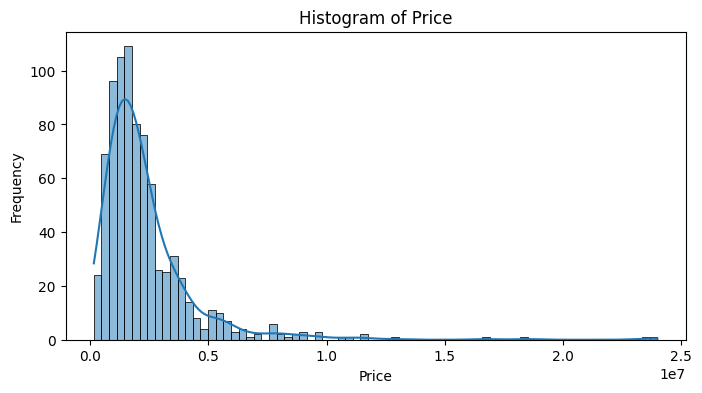

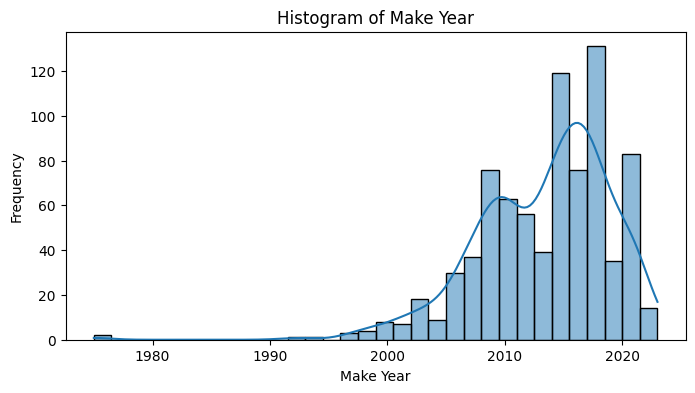

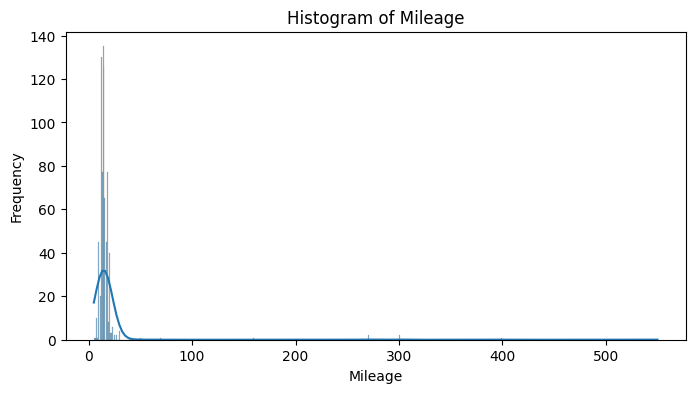

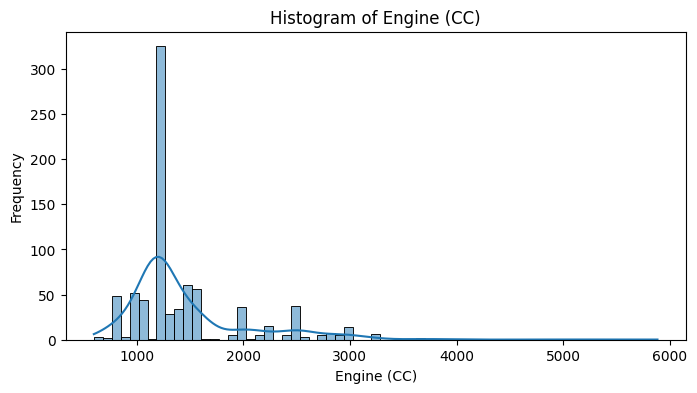

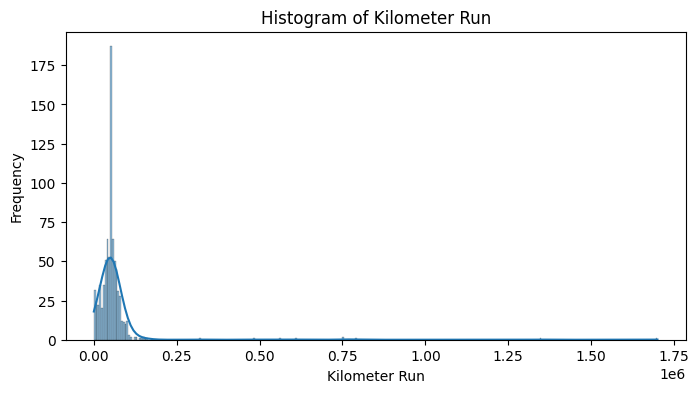

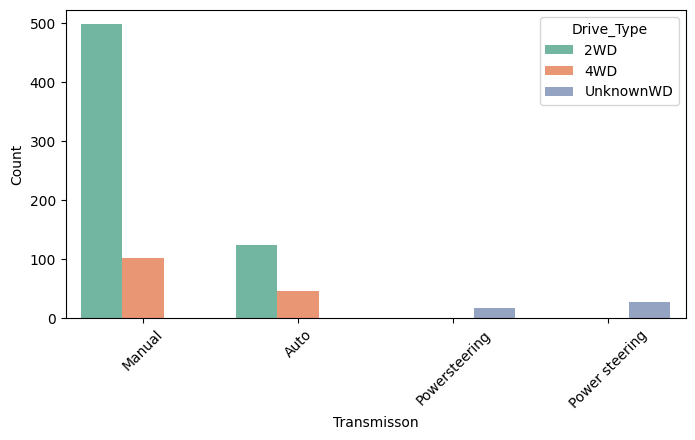

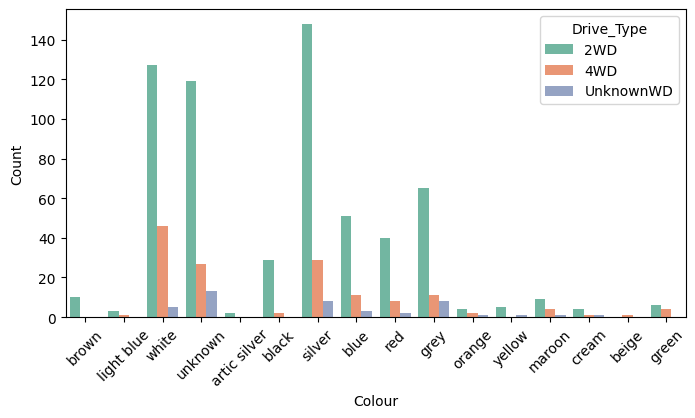

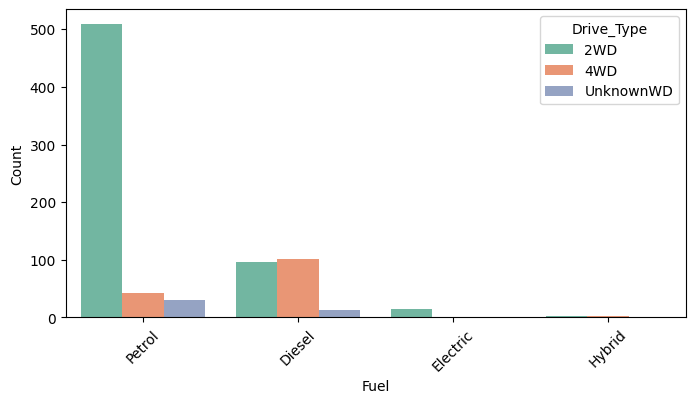

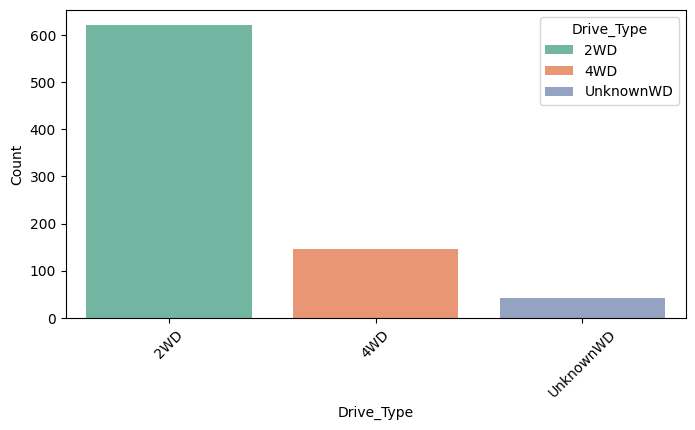

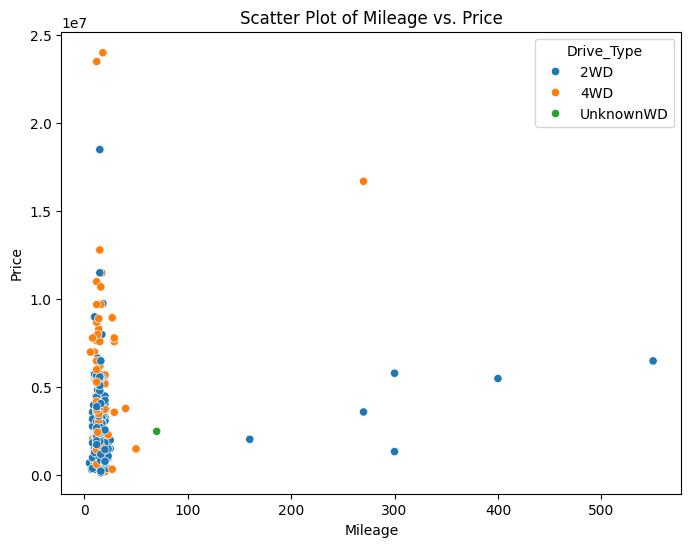

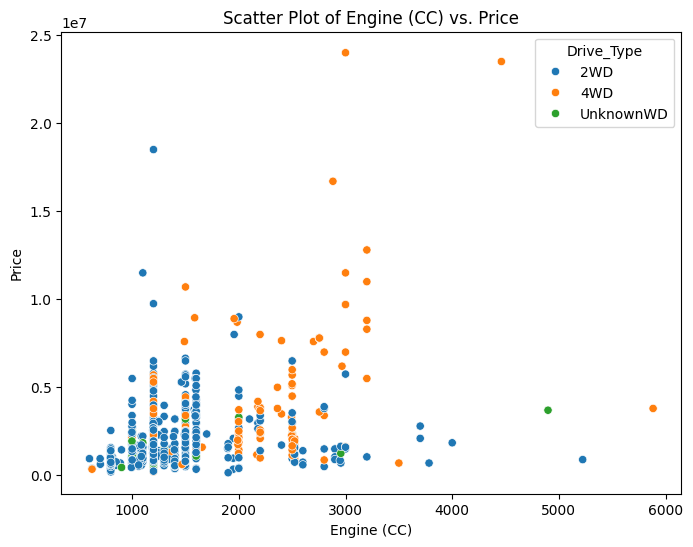

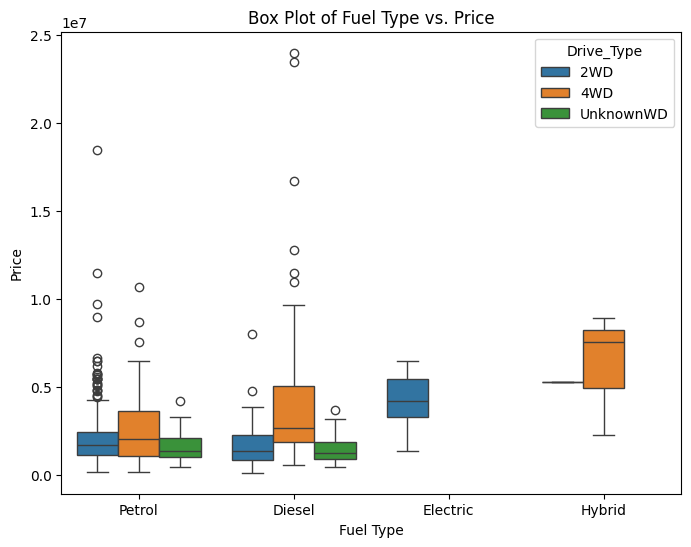

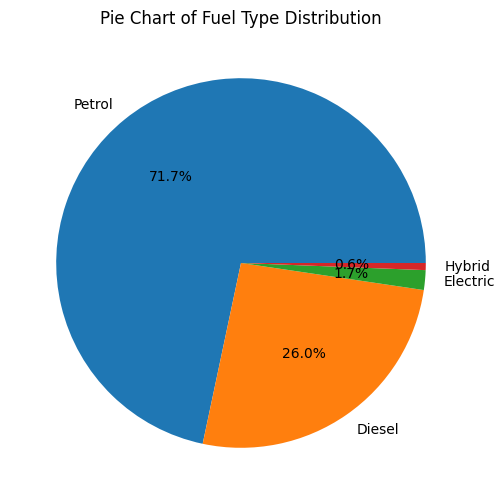

In [23]:
# Histograms
numeric_vars = ['Price', 'Make Year', 'Mileage', 'Engine (CC)', 'Kilometer Run']
for var in numeric_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned[var], kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Bar Charts
categorical_vars = ['Transmisson', 'Colour', 'Fuel', 'Drive_Type']
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_cleaned, x=var, hue='Drive_Type', palette='Set2', legend=True)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Scatter Plot of Mileage vs. Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Mileage', y='Price', hue='Drive_Type')
plt.title('Scatter Plot of Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Scatter Plot of Engine (CC) vs. Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Engine (CC)', y='Price', hue='Drive_Type')
plt.title('Scatter Plot of Engine (CC) vs. Price')
plt.xlabel('Engine (CC)')
plt.ylabel('Price')
plt.show()

# Box Plots
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='Fuel', y='Price', hue='Drive_Type')
plt.title('Box Plot of Fuel Type vs. Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 6))
df_cleaned['Fuel'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Fuel Type Distribution')
plt.ylabel('')
plt.show()

# **Building Predictive Model For Mileage**

In [24]:
# Encode categorical variables
label_encoder = LabelEncoder()

# Handle non-numeric values in  columns in df_cleaned

df_cleaned['Colour'] = label_encoder.fit_transform(df_cleaned['Colour'])
df_cleaned['Transmisson'] = label_encoder.fit_transform(df_cleaned['Transmisson'])
df_cleaned['Fuel'] = label_encoder.fit_transform(df_cleaned['Fuel'])
df_cleaned['Name'] = label_encoder.fit_transform(df_cleaned['Name'])
df_cleaned['Drive_Type'] = label_encoder.fit_transform(df_cleaned['Drive_Type'])

In [25]:

# Split the dataset into features and target variable
X = df_cleaned.drop(columns=['Mileage'])
y = df_cleaned['Mileage']


In [26]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [28]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# **Model Performance Metrices**

In [29]:

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

#If Price then it was 0.432

Mean Absolute Error (MAE): 9.215766871165643
Mean Squared Error (MSE): 1797.4319552147238
Root Mean Squared Error (RMSE): 42.39613137085416
R-squared (R2): 0.16135459936428287
